# MOA "Array Interface"

This is very much a work in progress. I want to see how far a python wrapper around a moa interface will take us.

In [1]:
from moa.frontend import LazyArray

In [2]:
expression = (LazyArray(name='A', shape=(3, 4)).T)[0] - 1 + LazyArray(name='B', shape=(3,))

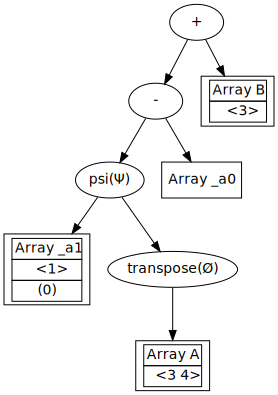

In [3]:
expression

In [4]:
print(expression.compile())



def f(A, B):
    
    if (not ((len(B.shape) == 1) and (len(A.shape) == 2))):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((3 == B.shape[0]) and ((4 == A.shape[1]) and (3 == A.shape[0])))):
        
        raise Exception('arguments have invalid shape')
    
    _a16 = Array((3,))
    
    for _i4 in range(0, 3):
        
        _a16[(_i4,)] = ((A[(_i4, 0)] - 1) + B[(_i4,)])
    return _a16


In [5]:
from moa.array import Array

A = Array(shape=(3, 4), value=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
B = Array(shape=(3,), value=(13, 14, 15))

exec(expression.compile())

C = f(A=A, B=B)

print('shape', C.shape)
print('value', C.value)

shape (3,)
value [13, 18, 23]
